# **Notebook 4: Predictive Modelling**

## Objectives

* The goal is to build predictive models that may identify customers likely to churn.
* To Interpret results and attain actionable business insights

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



In [ ]:
# change working directory

import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\slych\\Credit_Card_Customer_Churn_Analysis'

In [ ]:
# make parent of current directory the new current directory

os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [ ]:
# confirm new current directory

current_dir = os.getcwd()
current_dir

'c:\\Users\\slych'

#### 1. Load Libraries and Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler      # Standardises features and enable diff magnitude comparison
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load cleaned data

data = pd.read_csv(r'C:\Users\slych\Credit_Card_Customer_Churn_Analysis\Data\Outputs\cleaned_bank_churn.csv')

#### 2. Prepare Data for Modelling

In [ ]:
# Define features and target

X = data.drop('Churn', axis=1)
y = data['Churn']                                   # Bug fix: Ensure 'Churn' is the target variable by Copilot's suggestion


In [ ]:
# Scale numeric features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#### 3. Logistic Regression (Baseline Model)

In [46]:
# Train
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred_lr = logreg.predict(X_test)
y_prob_lr = logreg.predict_proba(X_test)[:, 1]

# Evaluate
print("🔍 Logistic Regression")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

🔍 Logistic Regression
[[1653   48]
 [ 132  193]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1701
           1       0.80      0.59      0.68       325

    accuracy                           0.91      2026
   macro avg       0.86      0.78      0.82      2026
weighted avg       0.91      0.91      0.91      2026

ROC-AUC: 0.9318735585402252


#### 4. Random Forest Classifier

In [49]:
# Train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate
print("Random Forest Classifier")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

Random Forest Classifier
[[1686   15]
 [  59  266]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.95      0.82      0.88       325

    accuracy                           0.96      2026
   macro avg       0.96      0.90      0.93      2026
weighted avg       0.96      0.96      0.96      2026

ROC-AUC: 0.988658255324922


#### 5. ROC (Receiver Operating Characteristic) Curves

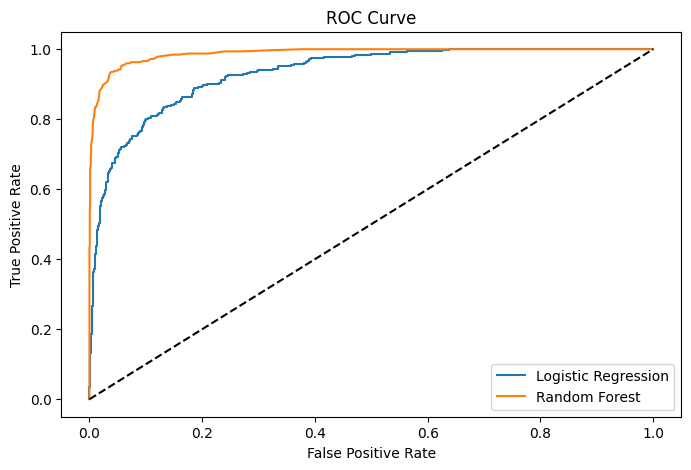

In [50]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 5))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


#### 6. Feature Importance (Random Forest)

In [ ]:
import numpy as np

# Get feature importance - Tells us which features are most important in the model

feature_names = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]

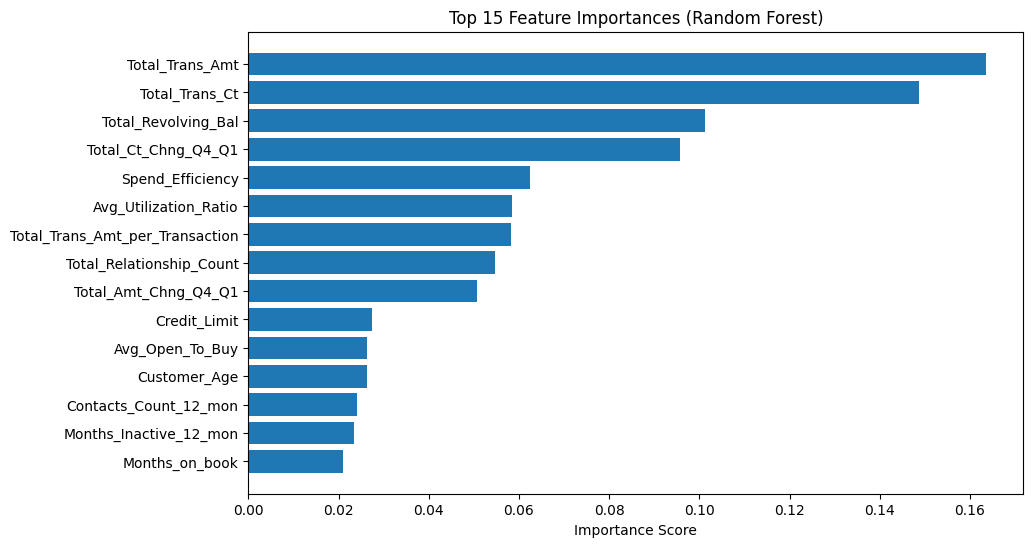

In [ ]:
# Plot feature importance (top 15 features) 

indices = np.argsort(importances)[-15:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()


#### 7. Model Interpretation

- **Total_Trans_Ct**, **Total_Trans_Amt_per_Transaction**, and **Total_Revolving_Bal** are top predictors of churn.
- **Random Forest** performed better than Logistic Regression (higher ROC-AUC and recall).
- Both models were affected by class imbalance — consider SMOTE or threshold tuning in future iterations.


#### 8. Key Business Recommendations:

1. **High-Risk Customers**: Focus retention efforts on those with decreasing transaction activity.
2. **Credit Monitoring**: Churned customers had lower average credit limits and open-to-buy balances — consider personalised financial reviews.
3. **Targeted Outreach**: Customers with more inactive months and service contacts churn more — improve service efficiency.
4. **Educational Segments**: Those with lower education/income groups showed higher churn — tailor education/support resources.

- This model could be deployed in a CRM to trigger retention workflows automatically using AI-powered scoring.


#### 9. Summary

The following was performed in this notebook:

- Built Logistic and Random Forest models  
- Evaluated and compared their performance  
- Interpreted top features influencing churn  
- Translated insights into actionable business advice  
